In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data Science WorkSpace/Data Science Tutorials/Geospatial Data Analysis/Shapefiles')

In [ ]:
# install libraries
!pip install geopandas 
!pip install pygeos
!pip install rtree

In [ ]:
# importing libraries
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
!ls

area_of_interest_.dbf
area_of_interest_.prj
area_of_interest_.sbn
area_of_interest_.sbx
area_of_interest_.shp
area_of_interest_.shp.ISHARA-PC.5816.1772.sr.lock
area_of_interest_.shx
belgian_cities.dbf
belgian_cities.prj
belgian_cities.sbn
belgian_cities.sbx
belgian_cities.shp
belgian_cities.shp.ISHARA-PC.5816.1772.sr.lock
belgian_cities.shx


In [ ]:
# Importing and plotting the cities shapefile
cities = gpd.read_file('belgian_cities.shp')

In [ ]:
cities.head()

,NAME_4,geometry
0,Anderlecht,"POLYGON ((143793.126 166452.379, 143610.878 16..."
1,Brussel,"POLYGON ((147766.293 170637.180, 147826.869 17..."
2,Elsene,"MULTIPOLYGON (((151867.674 167090.660, 151805...."
3,Etterbeek,"POLYGON ((152732.322 169655.021, 152703.407 16..."
4,Evere,"POLYGON ((153968.453 172252.061, 153885.348 17..."


In [ ]:
type(cities)

geopandas.geodataframe.GeoDataFrame

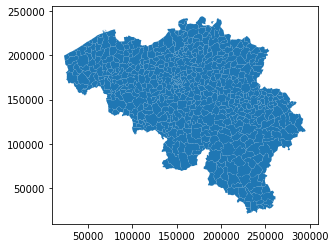

In [ ]:
cities.plot()

In [ ]:
print('No of cities in Belgium: ', len(cities))

No of cities in Belgium:  589


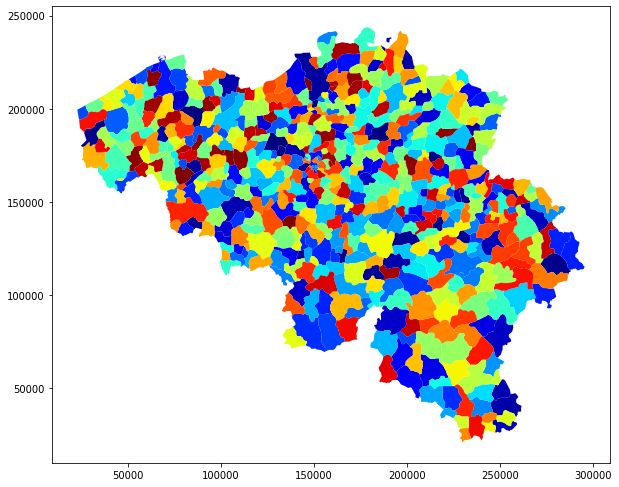

In [ ]:
cities.plot(cmap = 'jet', column = 'NAME_4', figsize=(10,10))

In [ ]:
# Importing and plotting AOI shapefile
AOI = gpd.read_file('area_of_interest_.shp') # area of interest

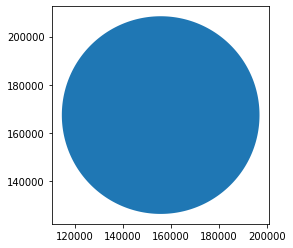

In [ ]:
AOI.plot()

### Next task is to plot the above two shapefiles together

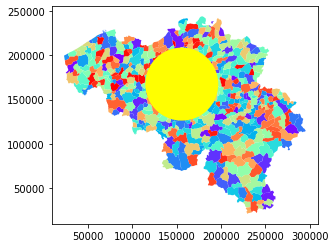

In [ ]:
# Display both shapefiles together
fig, ax = plt.subplots(1)
cities.plot(ax=ax, cmap='rainbow', column='NAME_4')
AOI.plot(ax=ax, facecolor='yellow')

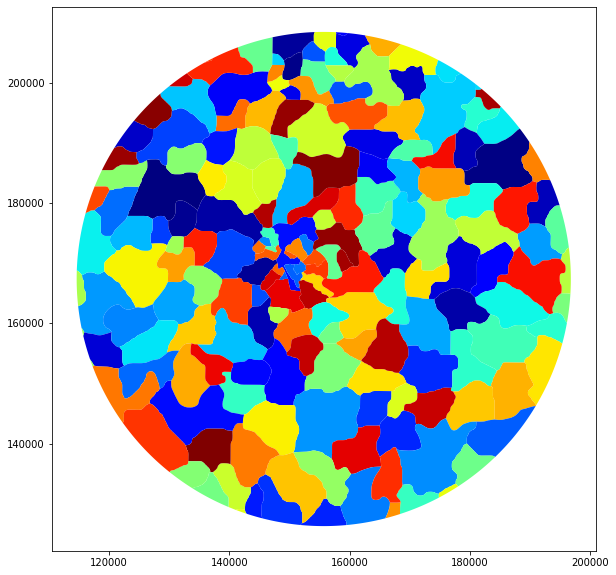

In [ ]:
# Intersecting
cities_in_AOI = gpd.overlay(cities, AOI, how = 'intersection')
cities_in_AOI.plot(figsize= (10,10), cmap='jet', column= 'NAME_4')

The plot above shows all the cities that belong to the Area of Interest

In [ ]:
cities_in_AOI

,NAME_4,Id,geometry
0,Anderlecht,0,"POLYGON ((143610.878 166467.875, 143529.937 16..."
1,Brussel,0,"POLYGON ((147826.869 170699.112, 147898.895 17..."
2,Elsene,0,"MULTIPOLYGON (((151805.602 167097.004, 151768...."
3,Etterbeek,0,"POLYGON ((152703.407 169319.336, 152697.836 16..."
4,Evere,0,"POLYGON ((153885.348 172043.212, 153828.963 17..."
...,...,...,...
181,Jemeppe-sur-Sambre,0,"POLYGON ((168387.327 129294.076, 168413.217 12..."
182,La Bruyère,0,"POLYGON ((177986.856 132936.779, 177800.116 13..."
183,Namur,0,"POLYGON ((174838.102 131142.185, 174843.326 13..."
184,Sambreville,0,"POLYGON ((166304.590 128401.648, 166608.776 12..."


In [ ]:
cities.crs

<Projected CRS: PROJCS["BD72 / Belgian Lambert 72",GEOGCS["BD72",D ...>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [ ]:
# Area calculation (in sq. meters)
cities_in_AOI.area

0      1.783468e+07
1      3.221806e+07
2      6.039562e+06
3      2.962803e+06
4      5.037014e+06
           ...     
181    1.751827e+07
182    2.408626e+07
183    2.395717e+06
184    4.317153e+06
185    3.290583e+07
Length: 186, dtype: float64

In [ ]:
# Assign a new column - Area 
cities_in_AOI['Area(km2)'] = cities_in_AOI.area/1000000 
cities_in_AOI.head()

,NAME_4,Id,geometry,Area(km2)
0,Anderlecht,0,"POLYGON ((143610.878 166467.875, 143529.937 16...",17.834684
1,Brussel,0,"POLYGON ((147826.869 170699.112, 147898.895 17...",32.218059
2,Elsene,0,"MULTIPOLYGON (((151805.602 167097.004, 151768....",6.039562
3,Etterbeek,0,"POLYGON ((152703.407 169319.336, 152697.836 16...",2.962803
4,Evere,0,"POLYGON ((153885.348 172043.212, 153828.963 17...",5.037014


In [ ]:
# Save the geodataframe to a .shp file
cities_in_AOI.to_file('intersected_cities.shp')